## Emmanuel Ezeobidi
#### eie0002@uah.edu

#### Question 1

There are two ways to go about the SVM formulation: \
\
(a) Hard Margin SVM which is used for linearly separable data:
\begin{align*}
    min_{w,b} \quad \frac{1}{2}||w||^2
\end{align*}
subject to $\quad y_i(w^Tx_i+b)\geq 1, \quad for \: i = 1,2,..,n.$
The term $\frac{1}{2}||w||^2$ is minimized to maximize the margin $\frac{2}{||w||}$ between two classes. Each training sample $(x_i, \: y_i)$ must be classified correctly within a margin of at least 1, i.e., $y_i(w^Tx_i+b)\geq 1, \: where \: y_i \in \{+1, -1\}$

(b) Soft Margin SVM \
\
For cases where the data may not be perfectly separable, the SVM formulation is:
\begin{align*}
    min_{w,b, \xi} \quad \frac{1}{2}||w||^2 + C\sum_{i=1}^n \xi_i
\end{align*}
subject to
\begin{align*}
    y_i(w^Tx_i+b)\geq 1, \quad for \: i = 1,2,..,n. \\
    \xi_i \geq 0, \quad for \: i = 1,2,..,n.
\end{align*}
The additional term $C\sum_{i=1}^n \xi_i$ penalizes misclassifications.


#### Question 2
For two parallel hyperplanes defined as
\begin{align*}
    w^Tx = k_1 \quad and \quad w_Tx = k_2 
\end{align*}
the distance between them is 
\begin{align*}
    d = \frac{|k_2 - k_1|}{||w||} \\
    d = \frac{|64 - 52|}{||w||} \\
    d = \frac{12}{||w||}
\end{align*}

#### Question 3
To avoid overfitting in SVM, one would have to adopt a soft-margin approach ( as in 1b i.e. introducing slack variables and choosing an approapriate, often smaller, $C$ value) and perform careful hypermeter tuning

#### Question 4

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from statistics import mean
plt.rcParams['font.family'] = 'Serif'
plt.rcParams['font.size'] = 15

2025-03-31 14:14:59.487237: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [14]:
url = "https://github.com/rahulbhadani/CPE490_590_Sp2025/raw/master/Data/Diabetes/diabetes.csv"
df = pd.read_csv(url)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [28]:
df.dropna(inplace=True)
X = df.drop('Outcome', axis=1).values
y = df[["Outcome"]].values

In [31]:
pca_2 = PCA(n_components=2)
pca_2.fit(X)
pca_2.explained_variance_ratio_

array([0.88854663, 0.06159078])

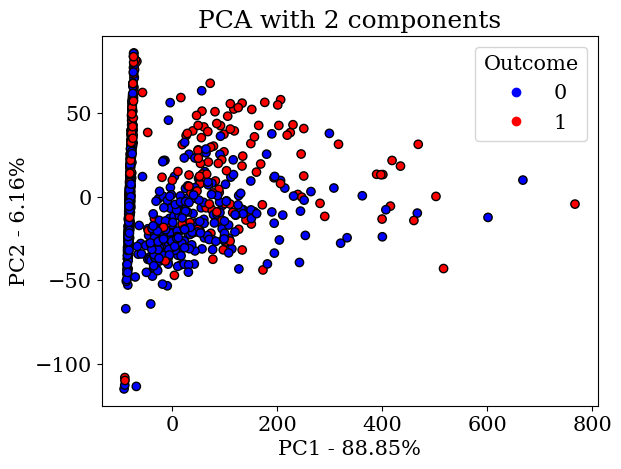

In [36]:
x_trans_2 = pca_2.transform(X)
scatter = plt.scatter(x_trans_2[:,0], x_trans_2[:,1], c=y, cmap='bwr', edgecolor='k')
plt.title('PCA with 2 components')
plt.xlabel('PC1 - {0}%'.format(round(pca_2.explained_variance_ratio_[0]*100, 2)))
plt.ylabel('PC2 - {0}%'.format(round(pca_2.explained_variance_ratio_[1]*100, 2)))
plt.legend(*scatter.legend_elements(), title="Outcome")
plt.show()

Towards the left of the plot, we see significant overlap between both classes (0 & 1), and so the two classes are not well-separated in this 2D PCA projection.

In [34]:
pca_3 = PCA(n_components=3)
pca_3.fit(X)
pca_3.explained_variance_ratio_


array([0.88854663, 0.06159078, 0.02579012])

The third principal component contributes around 2.58% of the total variance. 

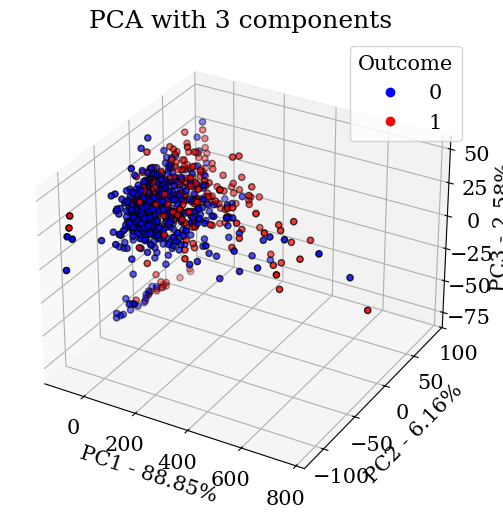

In [37]:
x_trans_3 = pca_3.transform(X)
# Plot 3D
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(x_trans_3[:,0], x_trans_3[:,1], x_trans_3[:,2], c=y, cmap='bwr', edgecolor='k')
ax.set_title('PCA with 3 components')
ax.set_xlabel('PC1 - {0}%'.format(round(pca_3.explained_variance_ratio_[0]*100, 2)))
ax.set_ylabel('PC2 - {0}%'.format(round(pca_3.explained_variance_ratio_[1]*100, 2)))
ax.set_zlabel('PC3 - {0}%'.format(round(pca_3.explained_variance_ratio_[2]*100, 2)))
plt.legend(*scatter.legend_elements(), title="Outcome")
plt.show()

The 3D plot does not seem to provide significant additional class separation beyond what is seen in the 2D projection. 

#### Question 5

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.inspection import DecisionBoundaryDisplay
plt.rcParams['font.family'] = 'Serif'
plt.rcParams['font.size'] = 21

In [3]:
from sklearn.datasets import make_classification
import pandas as pd

# Set random seed for reproducibility
seed = 200

# Generate synthetic dataset
X, y = make_classification(n_samples=500,      # Number of samples
                           n_features=2,       # Number of features
                           n_redundant=0,      # No redundant features
                           n_informative=2,    # All features are informative
                           n_clusters_per_class=1,  # One cluster per class
                           n_classes=2,        # Binary classification (2 classes)
                           flip_y=0.00,        # No label noise
                           class_sep=2.5,      # Factor separating the classes
                           random_state=seed)

df = pd.DataFrame(X, columns=["Feature1", "Feature2"])
df['Outcome'] = y

print(df.head())


   Feature1  Feature2  Outcome
0 -4.210066 -0.572593        1
1 -2.695253 -1.924271        1
2  2.943813  2.902176        0
3 -2.119540 -2.171209        1
4  3.126547  3.409669        0


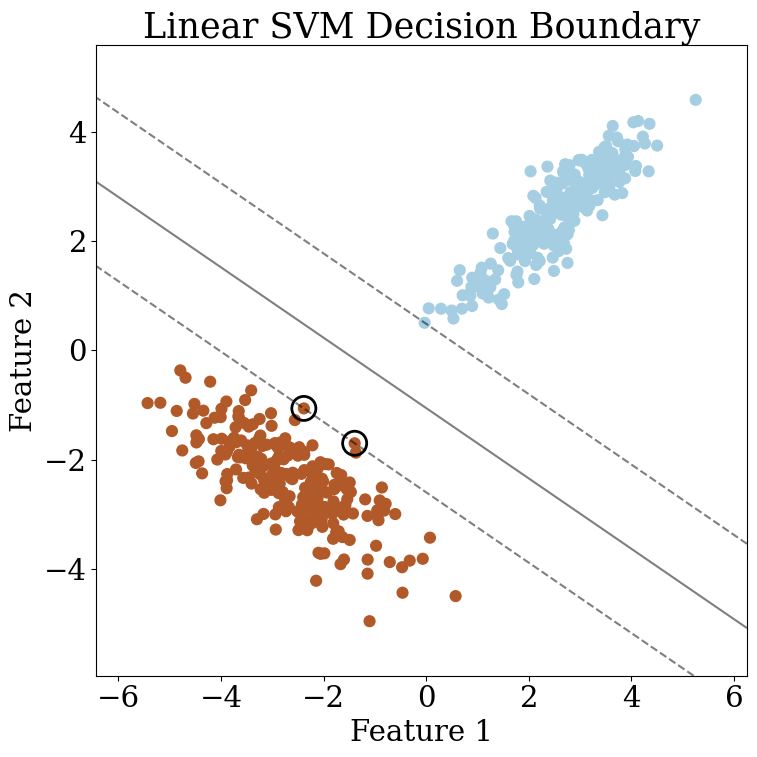

In [41]:
# Train the Linear SVM
clf = LinearSVC(C=1e6, loss="hinge", random_state=42, dual="auto").fit(X, y)

# Obtain the support vectors
decision_function = clf.decision_function(X)
support_vector_indices = np.where(np.abs(decision_function) <= 1 + 1e-15)
support_vectors = X[support_vector_indices]

# Plot the data points and decision boundary
plt.figure(figsize=(8,8))
plt.scatter(X[:,0], X[:,1], c=y, s=60, cmap=plt.cm.Paired)
ax = plt.gca()
DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    ax =ax,
    grid_resolution=50,
    plot_method="contour",
    colors="k",
    levels=[-1, 0, 1],
    alpha=0.5,
    linestyles=["--", "-", "--"],
)
plt.scatter(support_vectors[:,0], support_vectors[:,1], s=300, linewidth=2, facecolors="none", edgecolors="k")
plt.title("Linear SVM Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.tight_layout()
plt.show()

/tmp/ipykernel_3653/609333024.py:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


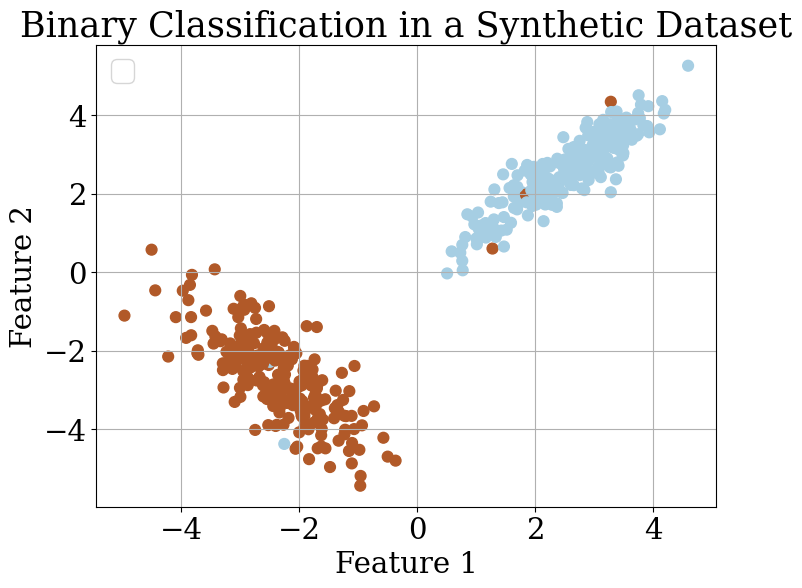

In [4]:
# b
# Generate synthetic dataset
X, y = make_classification(n_samples=500,      # Number of samples
                           n_features=2,       # Number of features
                           n_redundant=0,      # No redundant features
                           n_informative=2,    # All features are informative
                           n_clusters_per_class=1,  # One cluster per class
                           n_classes=2,        # Binary classification (2 classes)
                           flip_y=0.02,        # Noise = 0.02
                           class_sep=2.5,      # Factor separating the classes
                           random_state=seed)

# Plot the data
plt.figure(figsize=(8, 6))
plt.scatter(X[:,0], X[:, 1], c=y, s=60, cmap=plt.cm.Paired)
plt.title('Binary Classification in a Synthetic Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

Comparing this plot to the one in a, we see a slight overlap of classes or misclassification. Where a couple of brown dots are found in the blue clusters and vice versa which is due to the introduction of variability in terms of noise.

/home/emmanuel-ezeobidi/anaconda3/envs/cpe_project/lib/python3.11/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


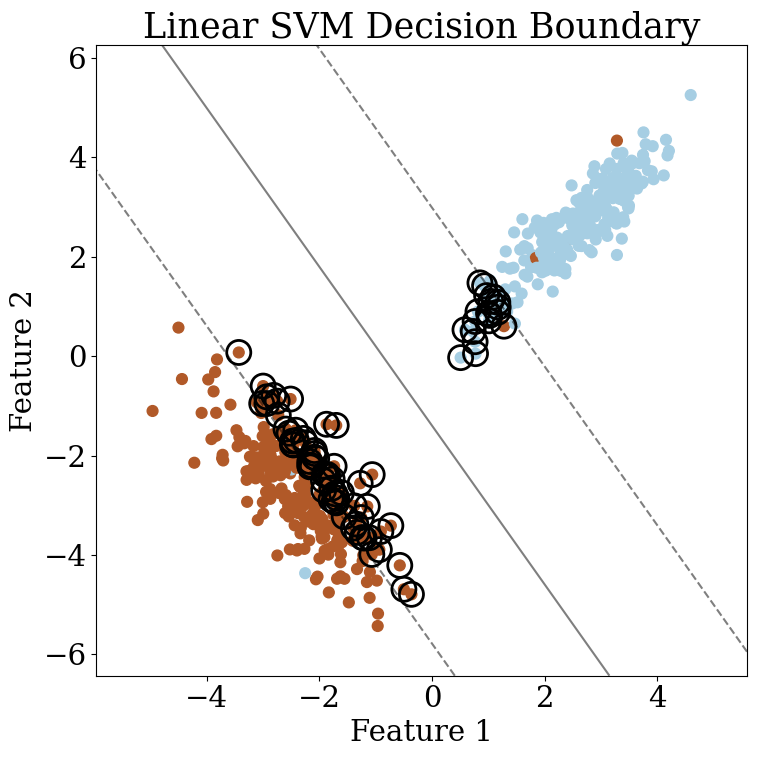

In [5]:
# Train the Linear SVM
clf = LinearSVC(C=1e6, loss="hinge", random_state=42, dual="auto").fit(X, y)

# Obtain the support vectors
decision_function = clf.decision_function(X)
support_vector_indices = np.where(np.abs(decision_function) <= 1 + 1e-15)
support_vectors = X[support_vector_indices]

# Plot the data points and decision boundary
plt.figure(figsize=(8,8))
plt.scatter(X[:,0], X[:,1], c=y, s=60, cmap=plt.cm.Paired)
ax = plt.gca()
DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    ax =ax,
    grid_resolution=50,
    plot_method="contour",
    colors="k",
    levels=[-1, 0, 1],
    alpha=0.5,
    linestyles=["--", "-", "--"],
)
plt.scatter(support_vectors[:,0], support_vectors[:,1], s=300, linewidth=2, facecolors="none", edgecolors="k")
plt.title("Linear SVM Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.tight_layout()
plt.show()

Compared to the plot in 1, we see a couple of points (the support vectors) beyond the boundaries for both classes. Also, there are more circled dots (support vectors) and the margin lines are closer to the data.

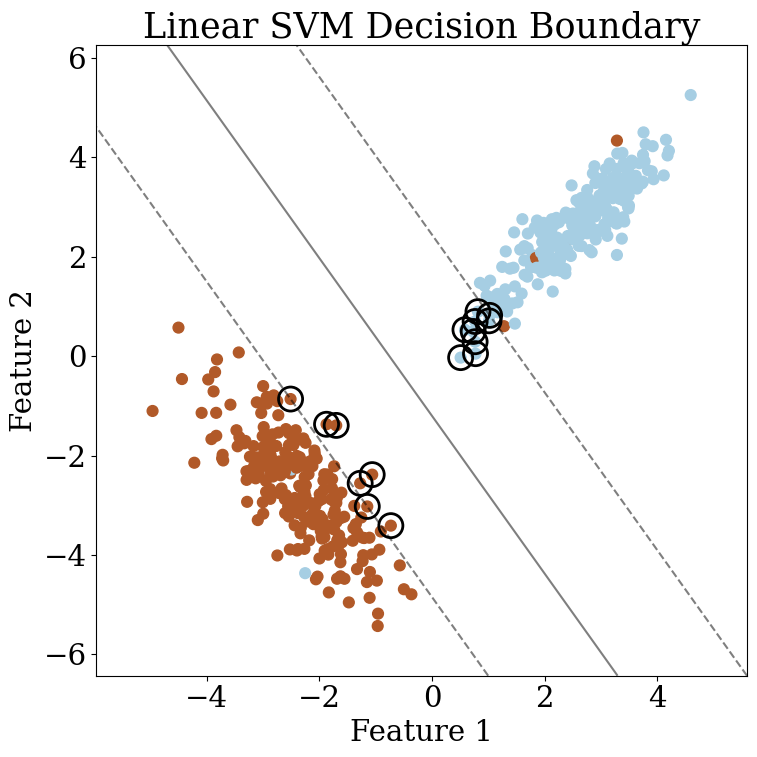

In [6]:
# Adding fuzziness to the Linear SVM
clf = LinearSVC(C=1, loss="hinge", random_state=42, dual="auto", max_iter=2000).fit(X, y)

# Obtain the support vectors
decision_function = clf.decision_function(X)
support_vector_indices = np.where(np.abs(decision_function) <= 1 + 1e-15)
support_vectors = X[support_vector_indices]

# Plot the data points and decision boundary
plt.figure(figsize=(8,8))
plt.scatter(X[:,0], X[:,1], c=y, s=60, cmap=plt.cm.Paired)
ax = plt.gca()
DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    ax =ax,
    grid_resolution=50,
    plot_method="contour",
    colors="k",
    levels=[-1, 0, 1],
    alpha=0.5,
    linestyles=["--", "-", "--"],
)
plt.scatter(support_vectors[:,0], support_vectors[:,1], s=300, linewidth=2, facecolors="none", edgecolors="k")
plt.title("Linear SVM Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.tight_layout()
plt.show()

There are less circled dots (support vectors) than in the plot prior. Also shows a harder margin with less support vectors.

/tmp/ipykernel_3653/2400855600.py:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


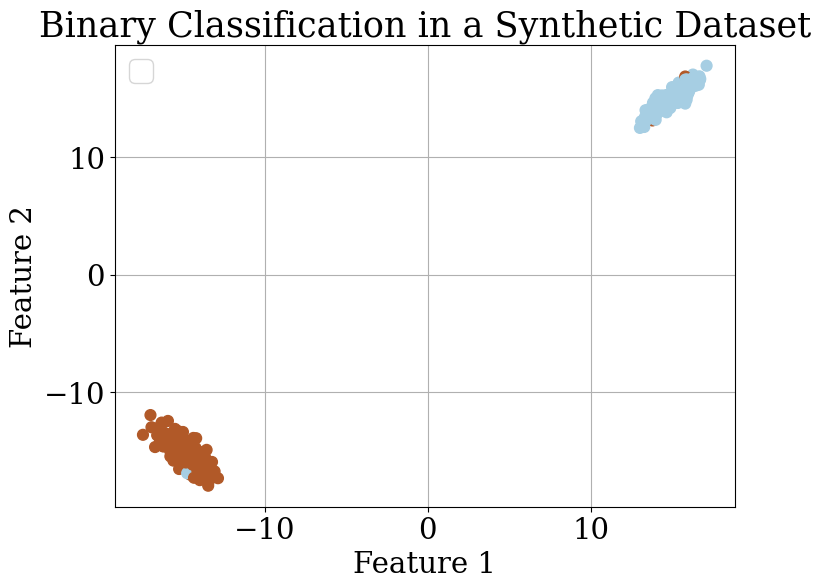

In [16]:
# c
# Generate synthetic dataset
X, y = make_classification(n_samples=500,      # Number of samples
                           n_features=2,       # Number of features
                           n_redundant=0,      # No redundant features
                           n_informative=2,    # All features are informative
                           n_clusters_per_class=1,  # One cluster per class
                           n_classes=2,        # Binary classification (2 classes)
                           flip_y=0.02,        # Noise = 0.02
                           class_sep=15,      # Factor separating the classes
                           random_state=seed)

# Plot the data
plt.figure(figsize=(8, 6))
plt.scatter(X[:,0], X[:, 1], c=y, s=60, cmap=plt.cm.Paired)
plt.title('Binary Classification in a Synthetic Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

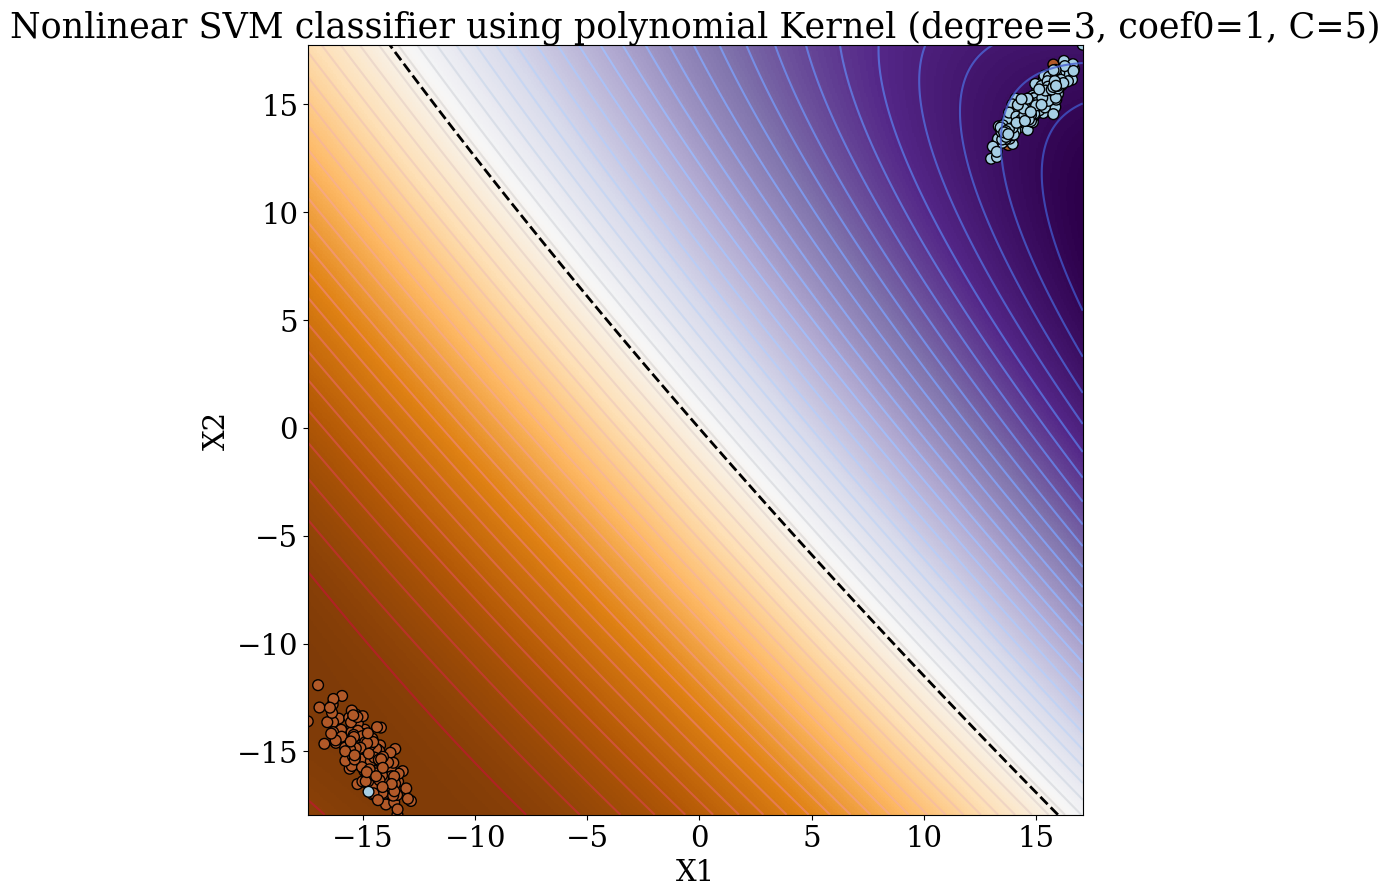

In [24]:
# Train nonlinear SVC
from sklearn.svm import SVC, NuSVC

# Initialize SVM classifiers
clf_poly = SVC(kernel='poly', degree=3, coef0=1, C=5)

# Fit the classifiers to the data
clf_poly.fit(X, y)

# Create a meshgrid to plot the decision boundary
x_min, x_max = X[:, 0].min(), X[:, 0].max()
y_min, y_max = X[:, 1].min(), X[:, 1].max()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))

# Compute the decision function for each point in the grid
Z_poly = clf_poly.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z_poly = Z_poly.reshape(xx.shape)

# Plot the decision boundary and margin
plt.figure(figsize=(10,10))


plt.imshow(
    Z_poly,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    aspect="auto",
    origin="lower",
    cmap=plt.cm.PuOr_r,
)


# Contour plot for the decision function values
contours = plt.contour(xx, yy, Z_poly, levels=np.linspace(Z_poly.min(), Z_poly.max(), 50), cmap=plt.cm.coolwarm, alpha=0.8)
# Plot the decision boundary (where decision function == 0)
plt.contour(xx, yy, Z_poly, levels=[0], linewidths=2, linestyles="dashed",colors="k")
# Plot the training points, color by class
plt.scatter(X[:, 0], X[:, 1], s=60, c=y, cmap=plt.cm.Paired, edgecolors="k")
#plt.axis([-3, 3, -3, 3])
plt.title('Nonlinear SVM classifier using polynomial Kernel (degree=3, coef0=1, C=5)')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

From both plots, the classes appear well seaparated. Using a class separation of 15 places the two classes far apart, making them almost linearly separable. Even though a polynomial kernel is used in the current plot, the SVM doesn’t need a complex, curving boundary to separate the classes and so it ends up looking nearly linear.